In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

In [2]:
# Load data into a pandas DataFrame
data = pd.read_csv('../data/togo-dapaong_qc.csv')
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
data.shape

(525600, 19)

In [4]:
# Summary statistics and missing values
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [5]:
# Missing values count per column
missing_values_counts = data.isnull().sum()
missing_values_counts

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [6]:
# List columns with > 5% missing values
threshold = 0.05 * len(data)
cols_missing_over_5pct = missing_values_counts[missing_values_counts > threshold]
display(cols_missing_over_5pct)

Comments    525600
dtype: int64

In [7]:
#  drop comments columns
# b/c it is not useful for analysis
data.drop(columns=['Comments'], inplace=True)

In [8]:
# Outlier detection and Basic cleaning
# columns GHI, DNI, DHI, ModA, ModB, WS, WSgust
# Z-score
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_zscores = data[columns_to_check].apply(zscore)

#  add these zscores to the original data by creating new columns for each zscore
for col in columns_to_check:
    data[f'{col}_zscore'] = df_zscores[col]

# # Flag outliers with |Z| > 3
outliers = (df_zscores.abs() > 3)
print("Number of outliers per column:\n", outliers.sum())
# # Add outlier flags to the original data
for col in columns_to_check:
    data[f'{col}_outlier'] = outliers[col]

# # Optionally: mark rows with any outlier
data['outlier_flag'] = outliers.any(axis=1)
data.head()

Number of outliers per column:
 GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WS_zscore,WSgust_zscore,GHI_outlier,DNI_outlier,DHI_outlier,ModA_outlier,ModB_outlier,WS_outlier,WSgust_outlier,outlier_flag
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,-1.003710,-1.131165,False,False,False,False,False,False,False,False
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,-0.866974,-0.865570,False,False,False,False,False,False,False,False
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,...,-0.798606,-0.971808,False,False,False,False,False,False,False,False
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,...,-0.798606,-0.865570,False,False,False,False,False,False,False,False
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,...,-0.730237,-0.865570,False,False,False,False,False,False,False,False


In [9]:
# shape of the cleaned data before dropping outliers
data.shape

(525600, 33)

In [10]:
# # Drop outliers
data_cleaned = data[~data['outlier_flag']]

In [11]:
# shape of the cleaned data
data_cleaned.shape

(516349, 33)

In [ ]:
# # handling missing values
# there is no rows with missing values
# for col in columns_to_check:
#     median_val = data[col].median()
#     data[col].fillna(median_val)


In [13]:
# Export cleaned data
data_cleaned.to_csv('../data/togo_clean.csv', index=False)

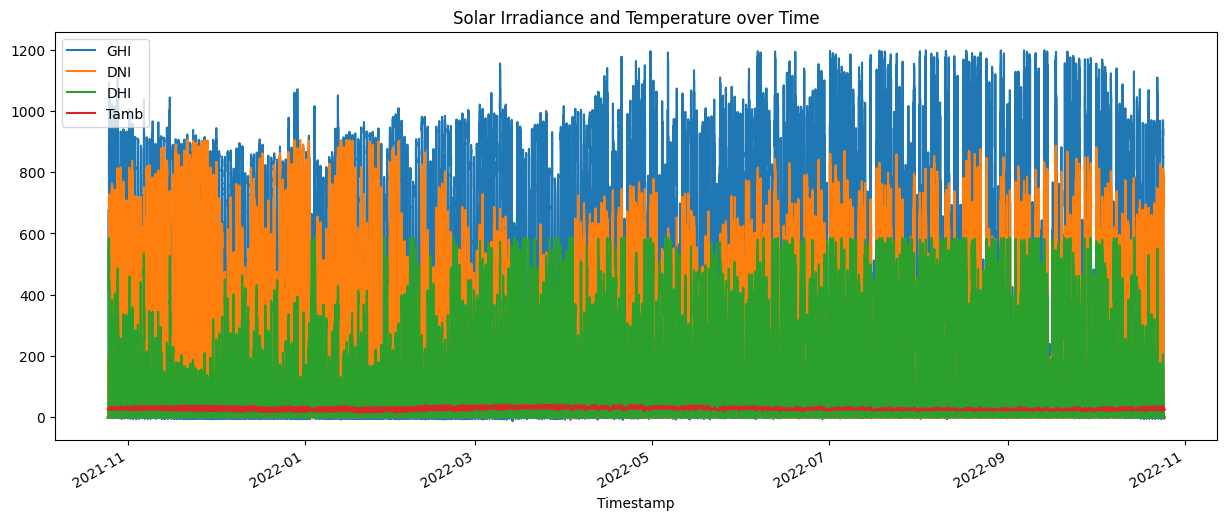

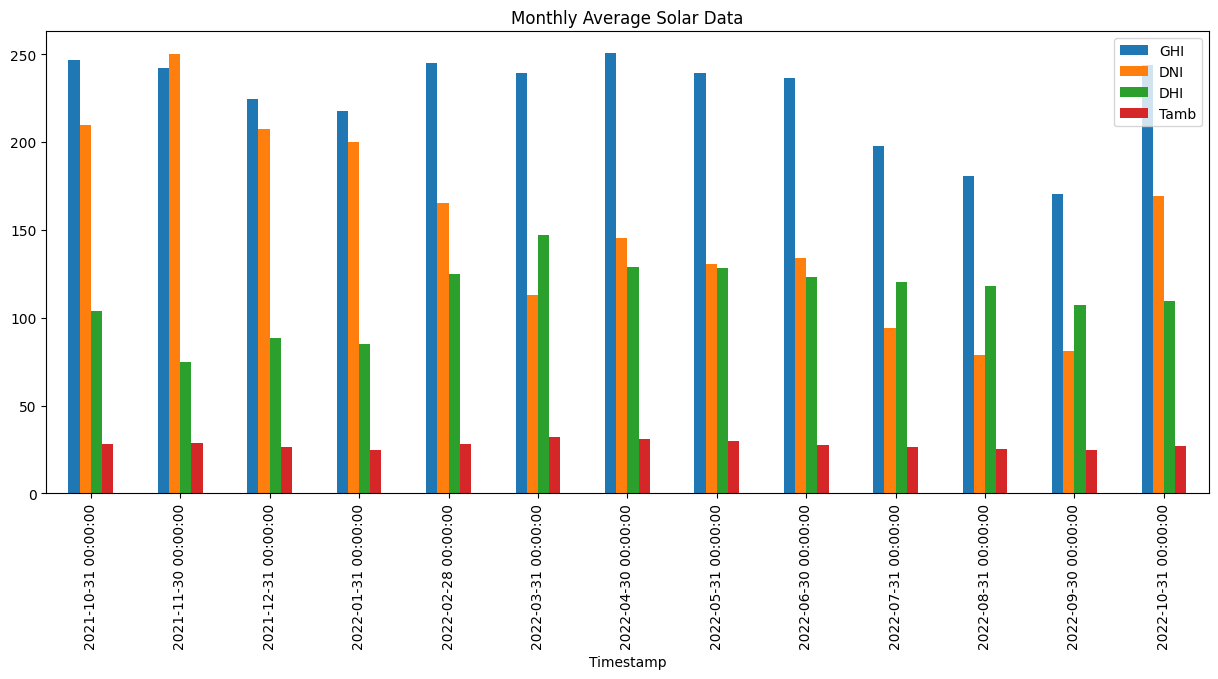

In [ ]:
# Time series analysis

data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])
data_cleaned.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb over time
data_cleaned[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15,6))
plt.title('Solar Irradiance and Temperature over Time')
plt.show()

# Aggregate monthly
df_monthly = data_cleaned.resample('ME').mean()
df_monthly[['GHI', 'DNI', 'DHI', 'Tamb']].plot(kind='bar', figsize=(15,6))
plt.title('Monthly Average Solar Data')
plt.show()

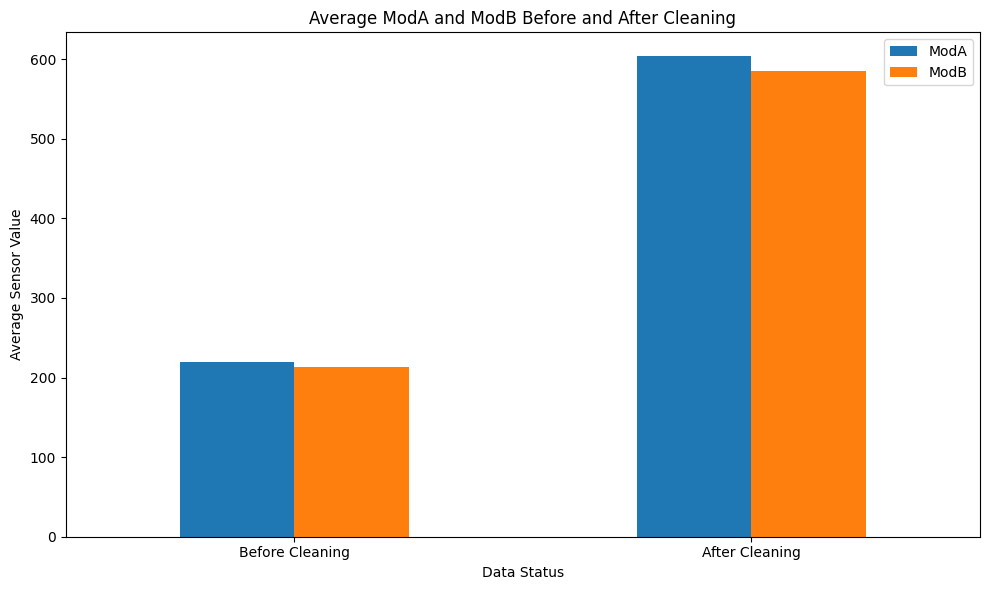

In [78]:
# clening impact of outliers
# Group by cleaning flag and plot average ModA and ModB pre and post-cleaning
#  Group by outlier flag
data_grouped = data.groupby('outlier_flag')[['ModA', 'ModB']].mean()
data_grouped.index = ['Before Cleaning', 'After Cleaning']
# Plot
data_grouped.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Average ModA and ModB Before and After Cleaning')
plt.ylabel('Average Sensor Value')
plt.xlabel('Data Status')
plt.tight_layout()
plt.show() 

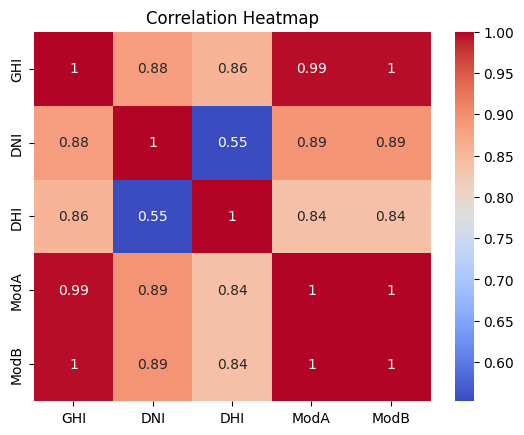

In [82]:
# Correlation & Relationships
# Correlation heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
corr = data_cleaned[corr_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


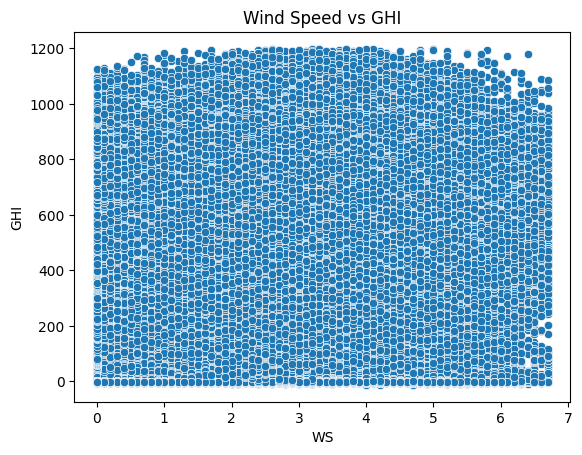

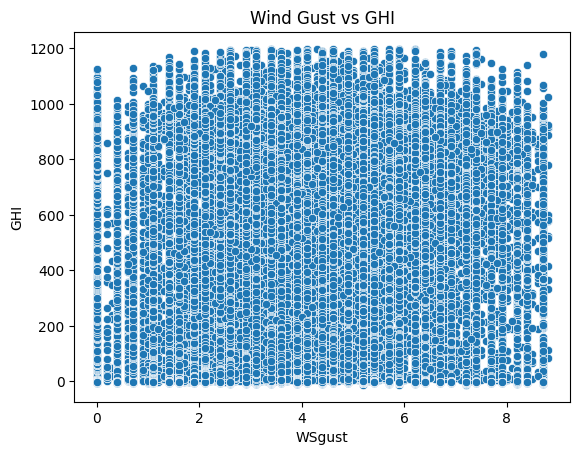

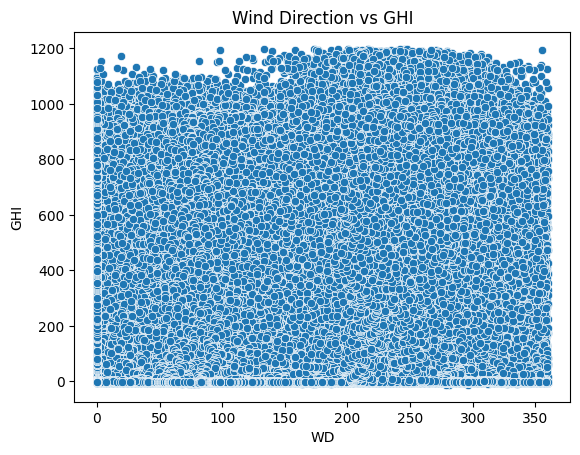

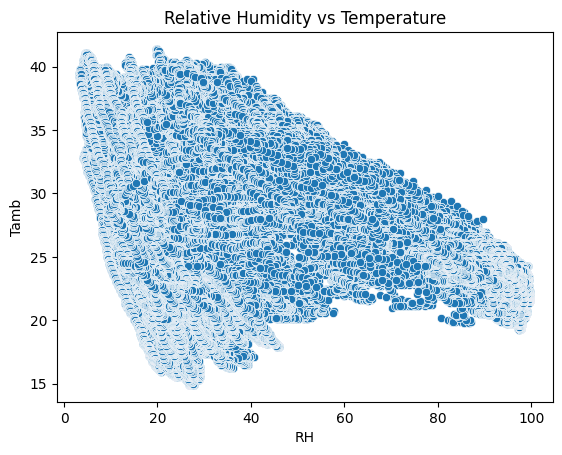

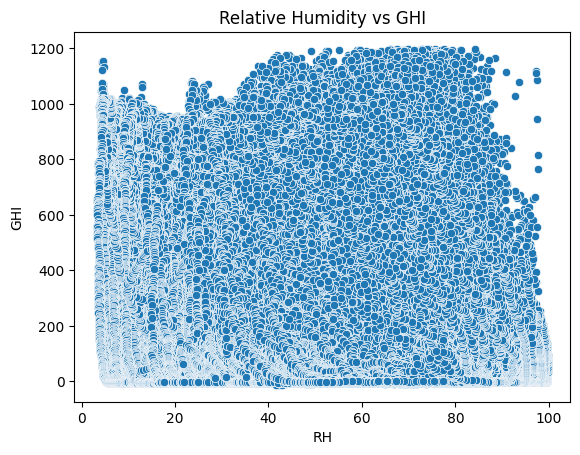

In [83]:
# Scatter plots
sns.scatterplot(data_cleaned, x='WS', y='GHI')
plt.title('Wind Speed vs GHI')
plt.show()

sns.scatterplot(data_cleaned, x='WSgust', y='GHI')
plt.title('Wind Gust vs GHI')
plt.show()

sns.scatterplot(data_cleaned, x='WD', y='GHI')
plt.title('Wind Direction vs GHI')
plt.show()

sns.scatterplot(data_cleaned, x='RH', y='Tamb')
plt.title('Relative Humidity vs Temperature')
plt.show()

sns.scatterplot(data_cleaned, x='RH', y='GHI')
plt.title('Relative Humidity vs GHI')
plt.show()


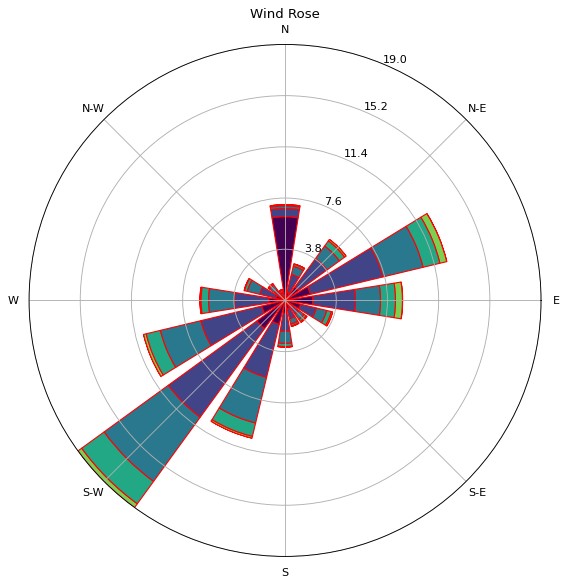

In [84]:
# Wind & Distribution Analysis
ax = WindroseAxes.from_ax()
ax.bar(data_cleaned['WD'], data_cleaned['WS'], normed=True, opening=0.8, edgecolor='red')
ax.set_title('Wind Rose')
plt.show()

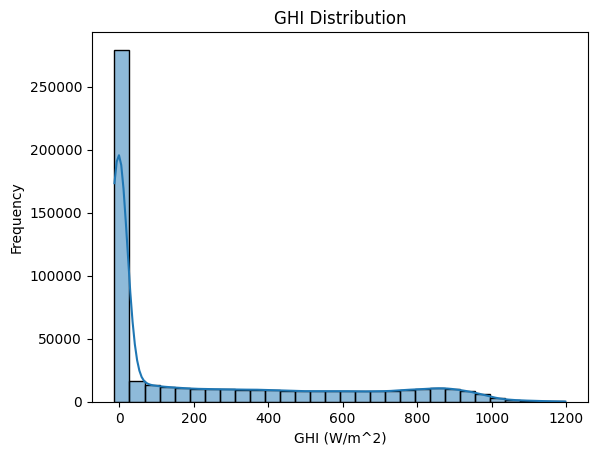

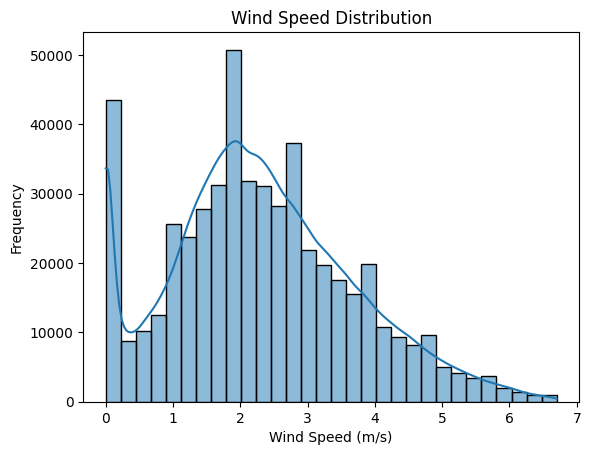

In [85]:
# Histograms:
# GHI distribution
sns.histplot(data_cleaned['GHI'], bins=30, kde=True)
plt.title('GHI Distribution')
plt.xlabel('GHI (W/m^2)')
plt.ylabel('Frequency')
plt.show()

# wind speed distribution
sns.histplot(data_cleaned['WS'], bins=30, kde=True)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()


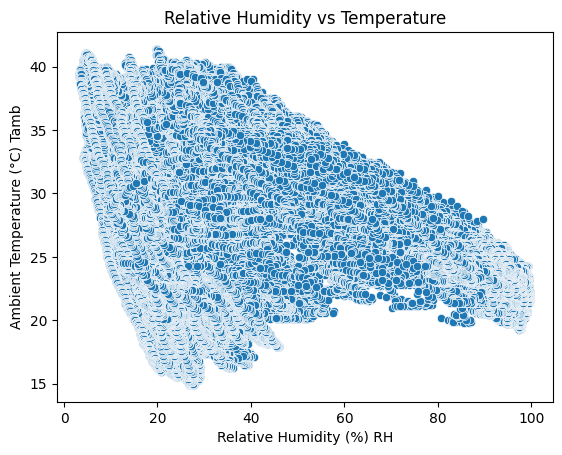

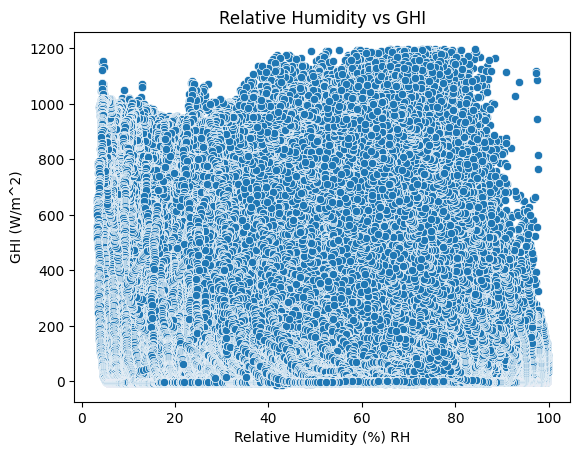

In [86]:
# Temprature Analysis
# Check influence of RH on temperature and solar radiation:
sns.scatterplot(data_cleaned, x='RH', y='Tamb')
plt.title('Relative Humidity vs Temperature')
plt.ylabel('Ambient Temperature (°C) Tamb')
plt.xlabel('Relative Humidity (%) RH')
plt.show()

sns.scatterplot(data_cleaned, x='RH', y='GHI')
plt.title('Relative Humidity vs GHI')
plt.ylabel('GHI (W/m^2)')
plt.xlabel('Relative Humidity (%) RH')
plt.show()

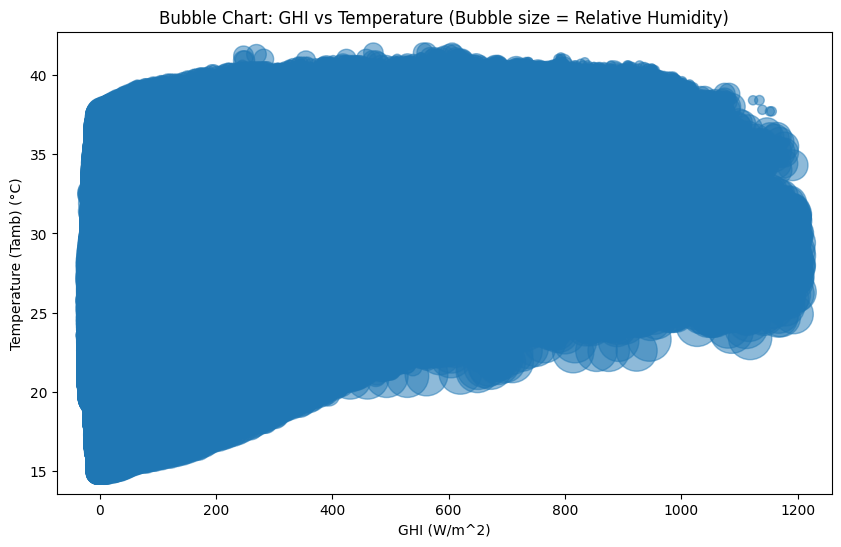

In [87]:
# Bubble chart
plt.figure(figsize=(10,6))
plt.scatter(data_cleaned['GHI'], data_cleaned['Tamb'], s=data_cleaned['RH']*10, alpha=0.5)
plt.ylabel('Temperature (Tamb) (°C)')
plt.xlabel('GHI (W/m^2)')
plt.title('Bubble Chart: GHI vs Temperature (Bubble size = Relative Humidity)')
plt.show()